# Zero Fluff Data-Driven Decision-Making in Real-Life Business
***

## Description:
***

This project serves to display a real-life business scenario where I use my skills to solve problems in plain simple English for non-technical stakeholders. I am intentionally stripping away all fanciness and fluff, and getting straight to the answer to the question in the scenario.

***_This is not to show off coding and technical skills; this is to show off question-answering skills._***

### Real-Life Business Scenario:
***

A company decides to run an advertisement over the course of a month. They come to me and ask me to find out if it made a difference in their sales.

#### My Approach:
***

I gather sales data from the month preceeding the advertisment, the month of the advertisement, and I gather the data the month after the advertisement.
***

#### Data Gathered:
***
Preceding Month Sales Data = $300, $200, $150, $820, $490, $123, $745, $281, $109, $123, $360, $628, $295

Month of Ad Sales Data = $432, $121, $345, $542, $621, $456, $357, $214, $784, $245, $165, $542, $457

Proceeding Month Sales Data = $234, $489, $347, $678, $654, $789, $123, $497, $347, $987, $124, $654, $467

###### *This is all arbitrary data
***

##### Question: Did the ad affect sales?
****

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [4]:
preceeding_month_sales_data = [300, 200, 150, 820, 490, 123, 745, 281, 109, 123, 360, 628, 295]
month_of_ad_sales_data = [432, 121, 345, 542, 621, 456, 357, 214, 784, 245, 165, 542, 457]
proceeding_month_sales_data = [234, 489, 347, 678, 654, 789, 123, 497, 347, 987, 124, 654, 467]

***
I set my significance level to 5%, meaning I am willing to accept a 5% chance I am wrong, and I test the null hypothesis, which means I am finding out if there is any statistical signifance to the difference in the data (the ad made a difference) or if the changes are by chance.

If the p-value is less than my significance level, I will reject the null hypothesis (it did not happen by chance; the ad did something).
***

In [58]:
significance_level = 0.05 # 5%
u_stat, p_value = stats.mannwhitneyu(preceeding_month_sales_data, proceeding_month_sales_data) # Calculates p-value

if p_value < significance_level:
    print(f"p-value: {p_value}")
    print(f"The p-value is less than the significance level")
    print(f"There is sufficient evidence that the affected sales.")
else:
    print(f"p-value: {p_value}")
    print(f"The p-value is greater than the significance level")
    print(f"There is sufficient evidence that the ad didn't affect sales.")

p-value: 0.16573539460834374
The p-value is greater than the significance level
There is sufficient evidence that the ad didn't affect sales.


# Question 1 Answer: There is sufficient evidence that the ad did not affect sales.
***

***
# From this point on would be Appendix material
***

#### Machine Learning for Simple Visualization of Changes in Sales Trends
***

In [59]:
def LinearRegLine(data):
    x = np.array(range(1,len(data)+1)).reshape(-1,1)
    y = data
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    return model, predictions

In [60]:
model1, trend1 = LinearRegLine(preceeding_month_sales_data)
model2, trend2 = LinearRegLine(month_of_ad_sales_data)
model3, trend3 = LinearRegLine(proceeding_month_sales_data)

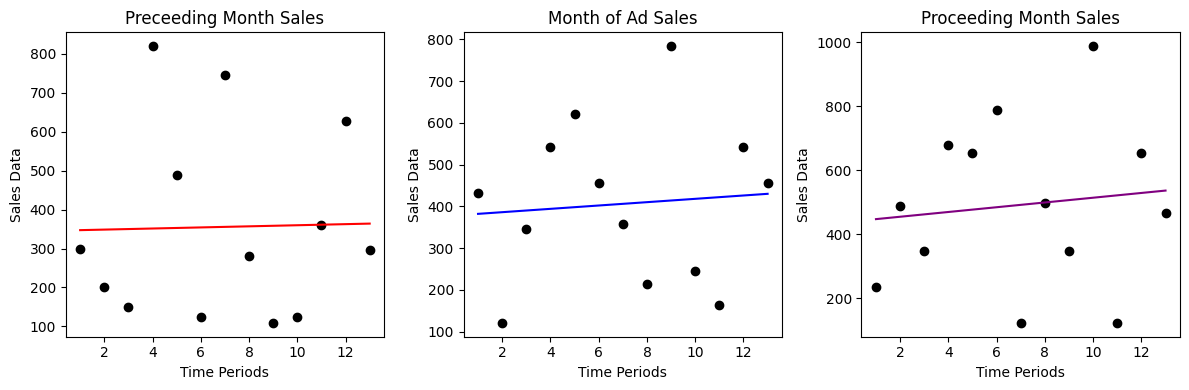

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

axs[0].scatter(range(1,len(preceeding_month_sales_data)+1),preceeding_month_sales_data, color='black')
axs[0].plot(range(1,len(preceeding_month_sales_data)+1),trend1,color='red')
axs[0].set_title("Preceeding Month Sales")
axs[0].set_xlabel("Time Periods")
axs[0].set_ylabel("Sales Data")

axs[1].scatter(range(1,len(month_of_ad_sales_data)+1), month_of_ad_sales_data, color='black')
axs[1].plot(range(1,len(month_of_ad_sales_data)+1), trend2, color='blue')
axs[1].set_title("Month of Ad Sales")
axs[1].set_xlabel("Time Periods")
axs[1].set_ylabel("Sales Data")

axs[2].scatter(range(1,len(proceeding_month_sales_data)+1), proceeding_month_sales_data, color='black')
axs[2].plot(range(1,len(proceeding_month_sales_data)+1), trend3, color='purple')
axs[2].set_title("Proceeding Month Sales")
axs[2].set_xlabel("Time Periods")
axs[2].set_ylabel("Sales Data")

plt.tight_layout()
plt.show()

***
#### Observation: There seems to be an increasingly positive trend.
***
Let's confirm...

In [62]:
print(f"For every unit in time passed in the preceeding month, sales increased by {model1.coef_}")
print(f"For every unit in time passed in the month of the ad, sales increased by {model2.coef_}")
print(f"For every unit in time passed in the proceeding month, sales increased by {model3.coef_}")

For every unit in time passed in the preceeding month, sales increased by [1.4010989]
For every unit in time passed in the month of the ad, sales increased by [4.]
For every unit in time passed in the proceeding month, sales increased by [7.42857143]


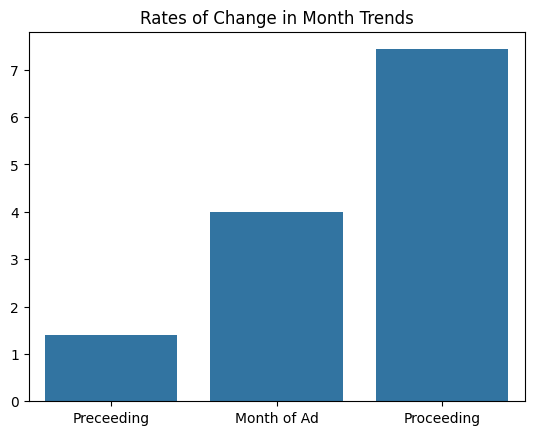

In [63]:
rates_of_change_in_trends = [model1.coef_[0], model2.coef_[0], model3.coef_[0]]
months = ["Preceeding", "Month of Ad", "Proceeding"]

sns.barplot(x=months, y=rates_of_change_in_trends)
plt.title("Rates of Change in Month Trends")
plt.show()

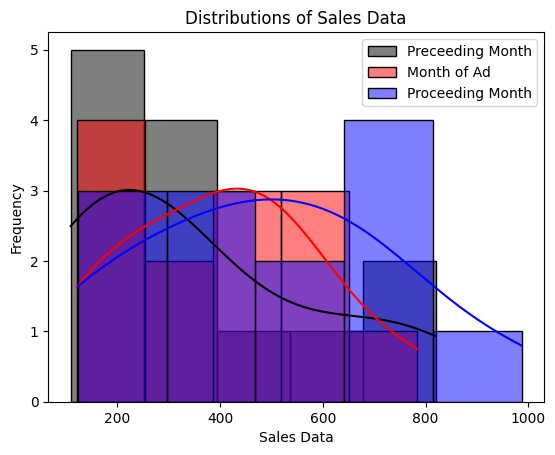

In [77]:
sns.histplot(preceeding_month_sales_data, color='black', kde=True, label="Preceeding Month")
sns.histplot(month_of_ad_sales_data, color='red', kde=True, label='Month of Ad')
sns.histplot(proceeding_month_sales_data, color='blue', kde=True, label="Proceeding Month")
plt.title("Distributions of Sales Data")
plt.xlabel("Sales Data")
plt.ylabel("Frequency")
plt.legend()